# Multiple Linear Regression with sklearn - Exercise Solution

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

Apart from that, please:
-  Display the intercept and coefficient(s)
-  Find the R-squared and Adjusted R-squared
-  Compare the R-squared and the Adjusted R-squared
-  Compare the R-squared of this regression and the simple linear regression where only 'size' was used
-  Using the model make a prediction about an apartment with size 750 sq.ft. from 2009
-  Find the univariate (or multivariate if you wish - see the article) p-values of the two variables. What can you say about them?
-  Create a summary table with your findings

In this exercise, the dependent variable is 'price', while the independent variables are 'size' and 'year'.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from sklearn.linear_model  import LinearRegression

## Load the data

In [2]:
DATA = pd.read_csv('real_estate_price_size_year.csv')

In [3]:
DATA.head(n=5)
DATA.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


## Create the regression

### Declare the dependent and the independent variables

In [4]:
x =  DATA[['size','year']]
y = DATA['price']
DATA

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
...,...,...,...
95,252460.400,549.80,2009
96,310522.592,1037.44,2009
97,383635.568,1504.75,2006
98,225145.248,648.29,2015


### Regression

In [5]:
linear_regression =  LinearRegression()
linear_regression.fit(x,y)

LinearRegression()

### Find the intercept

In [6]:
linear_regression.intercept_

np.float64(-5772267.017463279)

### Find the coefficients

In [7]:
linear_regression.coef_

array([ 227.70085401, 2916.78532684])

### Calculate the R-squared

In [8]:
linear_regression.score(x,y)

0.7764803683276795

### Calculate the Adjusted R-squared

In [11]:
Adjusted_R = 1-(1-linear_regression.score(x,y))*(x.shape[0]-1)/(x.shape[0]-x.shape[1]-1)
Adjusted_R

0.7718717161282502

In [12]:
# if we will compare Adjusted R and simple R we can notice that they are quite simillar 

### Compare the R-squared and the Adjusted R-squared

we can notice that value for R^2 and Adj R^2 they are simillar , but after we added year we can notice that adjR^2 is less than R^2 , that's why year is not significant ....

### Making predictions

Find the predicted price of an apartment that has a size of 750 sq.ft. from 2009.

In [13]:
linear_regression = LinearRegression()
linear_regression.fit(x,y)
linear_regression.predict([[750,2009]])

D:\etabs\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([258330.34465995])

### Calculate the univariate p-values of the variables

In [14]:
linear_regression.coef_

array([ 227.70085401, 2916.78532684])

In [15]:
linear_regression.intercept_
# linear_regression.score(x,y)

np.float64(-5772267.017463279)

In [16]:
linear_regression.score(x,y)

0.7764803683276795

In [17]:
from sklearn.feature_selection import f_regression

In [18]:
f_regression(x,y)

(array([285.92105192,   0.85525799]), array([8.12763222e-31, 3.57340758e-01]))

In [19]:
p_values = f_regression(x,y)[1]
p_values.round(3)

array([0.   , 0.357])

### Create a summary table with your findings

In [31]:
reg_summary  = pd.DataFrame(data = x.columns.values , columns = ['Predictors'])
reg_summary

,Predictors
0,size
1,year


In [34]:
reg_summary['Coefficients'] = linear_regression.coef_
reg_summary['P-values'] = p_values.round(3)
reg_summary

,Predictors,Coefficients,P-values
0,size,227.700854,0.000
1,year,2916.785327,0.357


Answer...

In [35]:
# we can notice that p-value of year is large than 0.05 it means this predictor doesn't affect much to output so let's check it with Pirson coefficent

In [20]:
correlation = DATA['year'].corr(DATA['price'])
correlation
print('Correlation is {}'.format(correlation)) ## corr is function to find correlation between two variables


Correlation is 0.09301407775270562


In [39]:
correlation1 = DATA['size'].corr(DATA['price'])
print('Correlation1 is {}'.format(correlation1))

Correlation1 is 0.8629827267012699


In [40]:
correlation3 = DATA['size'].corr(DATA['year'])
print('Correlation3 is {}'.format(correlation3))

Correlation3 is -0.09767810765389948


In [42]:
predictor_1 = DATA[['size']]
predictor_2 = DATA[['year']]
linear_regression1 = LinearRegression()
linear_regression2 = LinearRegression()
linear_regression1.fit(predictor_1,y)
linear_regression2.fit(predictor_2,y)
coef1 = linear_regression1.intercept_
coef2 = linear_regression2.intercept_
print(coef1,coef2)

101912.60180122897 -2757833.3102840106


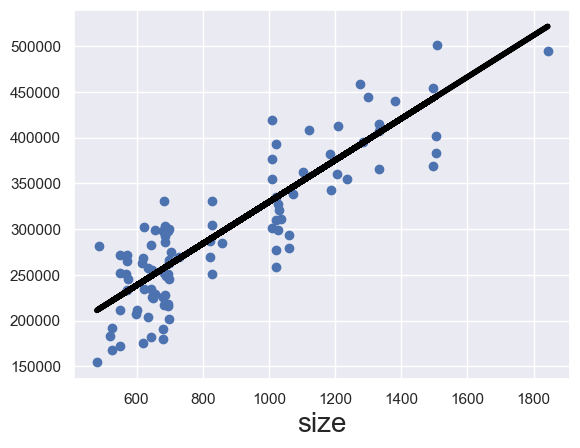

In [46]:
plt.scatter(DATA['size'],y)
y_1 = linear_regression1.intercept_ + linear_regression.coef_[0]*DATA['size']
y_2 = linear_regression2.intercept_ + linear_regression.coef_[1]*DATA['year']
line_1 = plt.plot(DATA['size'],y_1,lw = 4,c = 'black',label = 'ln-1')
plt.xlabel('size',fontsize = 20)
plt.show()

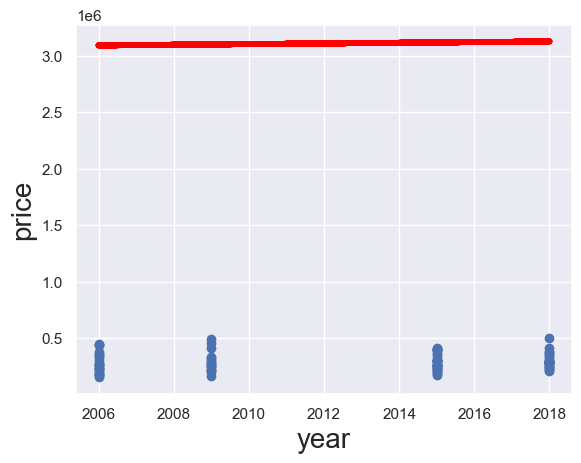

In [47]:
plt.scatter(DATA['year'],y)
line_2 = plt.plot(DATA['year'],y_2,lw = 4, c = 'red' , label = 'ln-2')
plt.xlabel('year',fontsize = 20)
plt.ylabel('price',fontsize = 20)
plt.show()